## Final comparison of model features

In [1]:
# Import library
import pickle


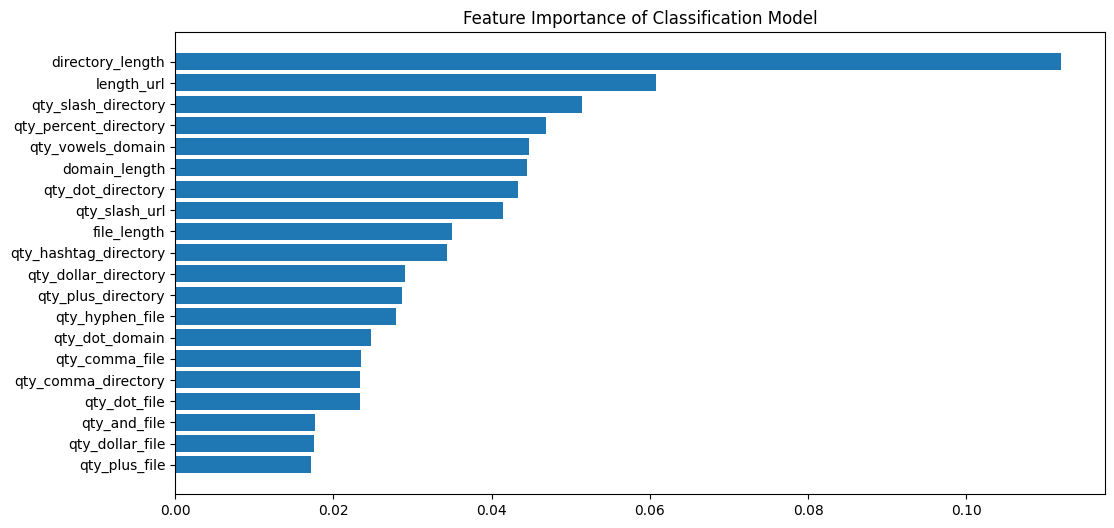

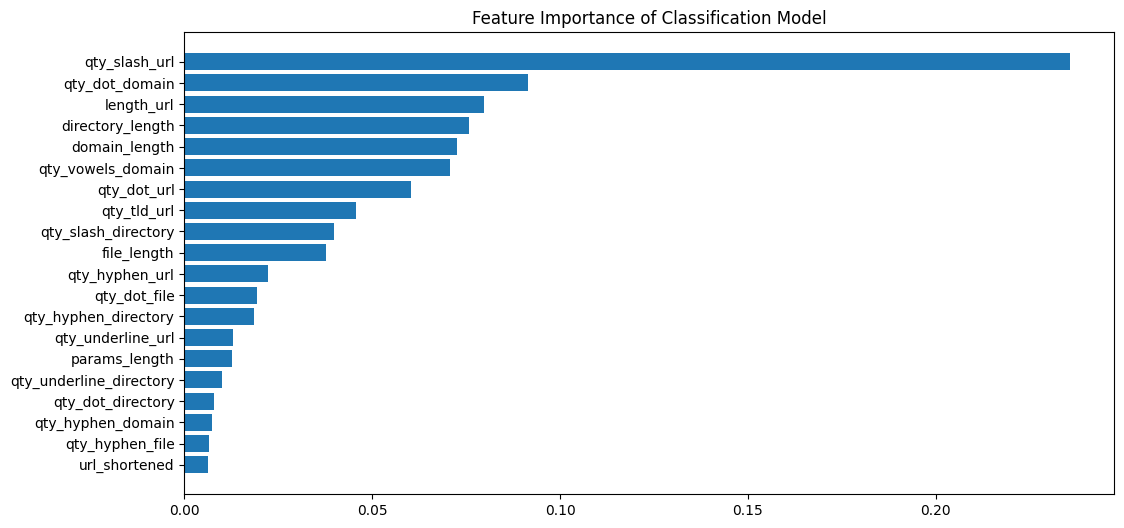

In [2]:
### To re-generate feature importance columns
import numpy as np
import matplotlib.pyplot as plt
import sys
# Config sys path
if ('../' not in sys.path):
    sys.path.append('../')
from fraud import *
from sklearn.model_selection import train_test_split

def feat_importance(model, feat_cols, path="./"):
    '''Rank feature importance among all features.'''
    # feature_importance = clf.feature_importances_
    feature_importances = np.mean([
        tree.feature_importances_ for tree in model.best_estimator_
    ], axis=0)
    sorted_idx = np.argsort(feature_importances)[-20:]
    fig = plt.figure(figsize=(12, 6))
    plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
    plt.yticks(range(len(sorted_idx)), feat_cols[sorted_idx])
    plt.title("Feature Importance of Classification Model")
    plt.savefig("../plots/feat_importance.png")
    plt.show()
    
    with open(path, "wb") as f:
        pickle.dump(list(feat_cols[np.argsort(feature_importances)])[::-1], f)
    
# Load features of 2 models sorted by feature importance 
df = load("../data/processed")
X = df.drop("phishing", axis=1)
y = df["phishing"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=df["phishing"])
feat_cols = np.array(X_train.columns)

feat_path_1="../models/tuned_model_phishing_domain.pkl"
with open(feat_path_1, "rb") as f:
    model = pickle.load(f)
feat_importance(model, feat_cols, path="../features/features_phishing_domain.pkl")

# Load features of 2 models sorted by feature importance 
df = load_new("../data/processed")
X = df.drop("phishing", axis=1)
y = df["phishing"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=df["phishing"])
feat_cols = np.array(X_train.columns)

feat_path_1="../models/tuned_model_malicious_url.pkl"
with open(feat_path_1, "rb") as f:
    model = pickle.load(f)
feat_importance(model, feat_cols, path="../features/features_malicious_url.pkl")

In [3]:
# Load features of 2 models sorted by feature importance 
feat_path_1="../features/features_malicious_url.pkl"
with open(feat_path_1, "rb") as f:
    features_malicious_url = pickle.load(f)
    
feat_path_2="../features/features_phishing_domain.pkl"
with open(feat_path_2, "rb") as f:
    features_phishing_domain = pickle.load(f)

In [4]:
features_malicious_url

['qty_slash_url',
 'qty_dot_domain',
 'length_url',
 'directory_length',
 'domain_length',
 'qty_vowels_domain',
 'qty_dot_url',
 'qty_tld_url',
 'qty_slash_directory',
 'file_length',
 'qty_hyphen_url',
 'qty_dot_file',
 'qty_hyphen_directory',
 'qty_underline_url',
 'params_length',
 'qty_underline_directory',
 'qty_dot_directory',
 'qty_hyphen_domain',
 'qty_hyphen_file',
 'url_shortened',
 'qty_tilde_directory',
 'qty_equal_url',
 'qty_params',
 'qty_equal_params',
 'qty_tilde_url',
 'qty_questionmark_url',
 'qty_percent_url',
 'qty_underline_file',
 'qty_slash_params',
 'qty_and_url',
 'qty_plus_url',
 'qty_plus_directory',
 'qty_and_params',
 'qty_equal_directory',
 'qty_dot_params',
 'qty_hyphen_params',
 'qty_underline_params',
 'qty_at_url',
 'qty_at_params',
 'qty_space_directory',
 'qty_questionmark_directory',
 'qty_hashtag_url',
 'qty_and_directory',
 'qty_comma_url',
 'tld_present_params',
 'qty_space_file',
 'qty_questionmark_params',
 'qty_hashtag_file',
 'qty_comma_dir

In [5]:
features_phishing_domain

['directory_length',
 'length_url',
 'qty_slash_directory',
 'qty_percent_directory',
 'qty_vowels_domain',
 'domain_length',
 'qty_dot_directory',
 'qty_slash_url',
 'file_length',
 'qty_hashtag_directory',
 'qty_dollar_directory',
 'qty_plus_directory',
 'qty_hyphen_file',
 'qty_dot_domain',
 'qty_comma_file',
 'qty_comma_directory',
 'qty_dot_file',
 'qty_and_file',
 'qty_dollar_file',
 'qty_plus_file',
 'qty_exclamation_directory',
 'qty_exclamation_file',
 'qty_questionmark_file',
 'qty_dot_url',
 'qty_underline_file',
 'qty_percent_file',
 'qty_hyphen_url',
 'qty_equal_directory',
 'qty_asterisk_file',
 'qty_slash_file',
 'qty_at_file',
 'qty_hyphen_directory',
 'qty_underline_directory',
 'qty_hyphen_domain',
 'qty_at_directory',
 'qty_tilde_directory',
 'qty_equal_file',
 'qty_questionmark_directory',
 'qty_tilde_file',
 'qty_space_directory',
 'qty_space_file',
 'params_length',
 'qty_tld_url',
 'qty_underline_url',
 'qty_tilde_params',
 'qty_percent_url',
 'qty_params',
 'url

In [6]:
# Check Jaccard Similarity of top k features
def jaccard_similarity(set1, set2):
    # intersection of two sets
    intersection = len(set1.intersection(set2))
    # Unions of two sets
    union = len(set1.union(set2))
    return intersection/union    

top_k = 10
jaccard_similarity(set(features_malicious_url[:top_k]), set(features_phishing_domain[:top_k]))

0.5384615384615384

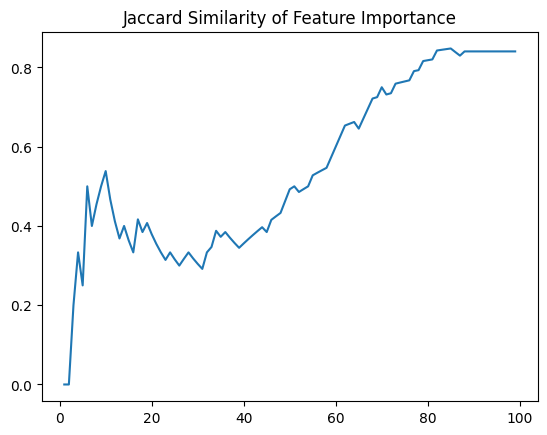

In [7]:
# Plot top k Jaccard Similarity
x_range = range(1, 100, 1)
similarity = []
for top_k in x_range:
    similarity.append(jaccard_similarity(set(features_malicious_url[:top_k]), set(features_phishing_domain[:top_k])))
plt.plot(x_range, similarity)
plt.title("Jaccard Similarity of Feature Importance")
plt.show()

In [8]:
# Common important features among top 10 for both
intersection = set(features_malicious_url[:10]).intersection(set(features_phishing_domain[:10]))
intersection

{'directory_length',
 'domain_length',
 'file_length',
 'length_url',
 'qty_slash_directory',
 'qty_slash_url',
 'qty_vowels_domain'}